# Modelo Probabilista de Tópicos LDA
En esta sesión vamos a analizar un <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a>  que permite gestionar datos textuales de gran volumen. En general los modelos de tópicos permiten descubrir a partir de los propios textos, el conjunto de tópicos o temas que estos abordan. Se trata de un análisis automatizado, que sería muy difícil de llevar a cabo manualmente por personas, debido a la cantidad y tamaño de los textos.
En particular estudiaremos el modelo <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW"> Latent Dirichlet Allocation (LDA) </a>, que modela los textos como provenientes de un modelo generativo, con una estructura oculta de tópicos y distribución de palabras en cada tópico, cuyas distribuciones a priori son Dirichlet.



El **modelo probabilista de tópicos** utiiza una representación de los documentos en el formato denominado **bag of words**, es decir sólo se considera la frecuencia de aparación de cada palabra del vocabulario en el texto y no el orden en que se encuentran:
texto y al mismo tiempo, la distribución de palabras en cada tópico. 
<img src="bog.png" width="400"/>

Dado un número de tópicos definido por el analista, el modelo permite asociar una distribución de tópicos en cada texto y al mismo tiempo, la distribución de palabras en cada tópico. 
<img src="lda1.png"/>
Usualmente, los tópicos se caracterizan por sus palabras mas frecuentes:
<img src="lda2.png"/>
Y cada texto por su distribución de tópicos en él:
<img src="lda0.png"/>

El modelo considera el siguiente  proceso generador de datos, es decir de cada palabra en un texto:
* A un texto en particular se le asocia una distribución de tópicos
* De la distribución de tópicos, se escoge un tópico
* De la distribución de palabras en el tópico, se escoge la palabra.

Son variables latentes (no observables) en este modelo, tanto la distribución de tópicos en cada documento como la distribución de palabras en cada tópico. 
    

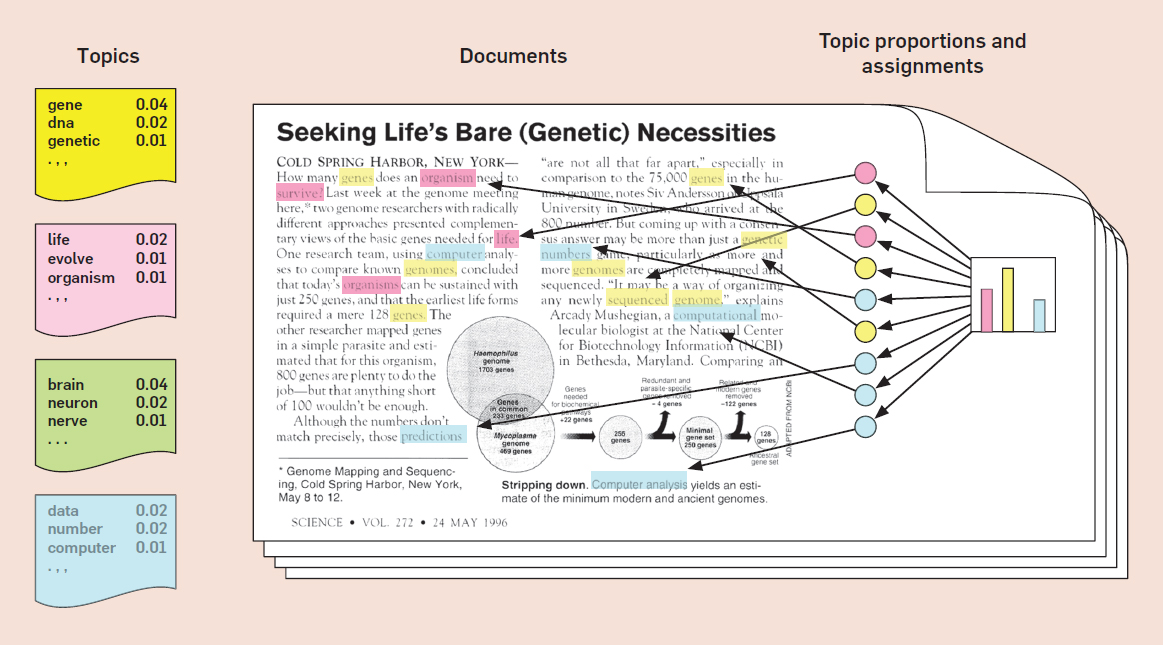

### Formalmente hablando

- Sea $\beta_{1:K}$ el conjunto de $K$ tópicos que se busca descubrir. Dónde $\beta_k$ representa una determinada distribución de las palabras del cuerpo de textos (o vocabulario) que se está modelando. 
- Sea $\theta_d$ la distribución de tópicos en el documento $d-$ésimo. Es decir $\theta_{d,k}$ será la probabilidad del tópico $k$ en el documento $d$.
- Sea $z_d$ el tópico asignado al documento $d$ y $z_{d,n}$ el tópico asignado a la $n-$ésima palabra del documento $d$. 
- Finalmente, sea $w_{d,n}$ la $n-$ésima palabra observada en el documento $d$, la cual es una palabra del vocabulario predefinido.
Con esta notación, el proceso generativo para LDA se puede describir de la manera siguiente:
$$ p(\beta_{1:K},\theta_{1:D},z_{1:D},w_{1:D}) = \prod_{i=1}^K p(\beta_i) \prod_{d=1}^D p(\theta_d)\left(\prod_{n=1}^N p(z_{d,n} \mid \theta_d) p(w_{d,n}\mid \beta_{1:K},z_{d,n})\right)$$
dónde $$\theta_d \sim Dirichlet(\alpha_{1:K})  \qquad \beta_{1:K} \sim Dirichlet(\eta_{1:V})$$
    y $$z_{d,n} \mid \theta_d \sim Multinomial(\theta_d) \qquad  w_{d,n} \mid z_{d,n},\beta_{1:K} \sim Multinomial(\beta_{z_{d,n}})$$
    
  

De manera gráfica, el proceso generativo se representa como: 

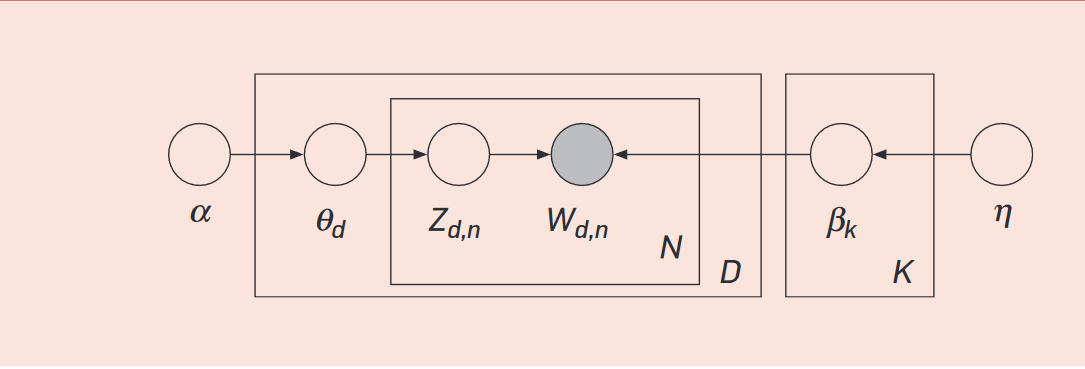

### Cálculo de la distribución a posteriori
Para descubrir la estructura oculta del modelo, se debe calcular la distribución a posteriori de los parámetros del modelo, esto es:

$$p(\beta_{1:K},\theta_{1:D},z_{1:D}\mid w_{1:D}) = \frac{p(\beta_{1:K},\theta_{1:D},z_{1:D},w_{1:D})}{p(w_{1:D})}$$

por la propiedad de natural conjugada de la distribución de Dirichlet con respecto a la distribución Multinomial, el numerador de esta expresión es fácilmente calculable. No es el caso del denominador, que considera todas las posibles estructuras de tópicos, lo que crece exponencialmente con el número de tópicos, tamaño del vocabulario y número de documentos.

Se consideran dos formas de aproximar la distribución a posteriori:




#### i) mediante técnicas de muestreo
que se basan en construir una cadena de Markov, cuya distribución en el equilibrio es la distribución a posteriori. De esta forma, se obtiene una muestra de la cadena de markov, que se asume (en el equilibrio) proviene de la distribución buscada. El caso mas conocido es Gibbs Sampling.

#### ii) mediante calculo variacional
que considera una familia de distribuciones parametrizadas que se acercan a la   la distribución a posteriori, y el problema a resolver, es encontrar los parámetros que minimizan la distancia a la distribución buscada.

Nota: para quienes estén interesados en la inferencia en LDA, revisar el notebook inferenciaLDA en el repositorio https://github.com/elianascheihing/INFO343-2022

# Evaluación de Calidad de la Estructura de Tópicos

Varios niveles de evaluación:

¿El método logró capturar la estructura oculta del dataset?

¿Se entienden los tópicos?

¿Son coherentes los tópicos?

¿El modelo nos permite analizar lo que queremos analizar? 
(requiere explicitar nuestros objetivos a priori)


### Perplejidad
Esta medida se considera intrínseca y proviene del modelamiento probabilista realizado. Su expresión es:

$$perplejidad(D_{test}) = exp\left\{-\frac{\prod_{d=1}^D log(p(w_d))}{\sum_{d=1}^D N_d}\right\}$$

Para utilizarla se debe considerar un conjunto de entrenamiento y otro de test. De manera que la perplejidad se interpreta como una medida de robustez de la estructura de tópicos definida. 
Es inversamente proporcional a la verosimilitud de los nuevos datos. A menor valor de perplejidad mas robusto el modelo.


### Métricas de coherencia:
Probabilidad condicional que dos palabras aparezcan juntas 
(idealmente en un dataset de referencia)

Existen muchas métricas de coherencia. Como por ejemplo:

**Coherencia UMass**, propuesta por por Minmo et al(2011):

$$C_{umass}= \frac{2}{N(N-1)}\sum_{i=2}^N \sum_{j=1}^{i-1} log \frac{p(w_i,w_j)}{p(w_j)}$$

Para cada tópico se calcula su coherencia considerando las N top words del mismo. En este caso, se utilizan las probabilidades calculadas a partir del corpus en estudio.

**Coherencia UCI:**

$$C_{UCI}= \frac{2}{N(N-1)}\sum_{i=1}^{N-1} \sum_{j=i+1}^{N} PMI(w_i,w_j)$$

donde $$PMI(w_i,w_j)=  log \frac{p(w_i,w_j)+\epsilon}{p(w_i)p(w_j)}$$
que se denomina *información mutua puntual*

En este caso las probabilidades conjuntas y marginales son obtenidas de Wikipedia, como corpus externo. 

**Coherencia NPMI** propuesta por Aletras y Stevenson (2013):

En este caso en lugar de considerar todas las probabilidades conjuntas, se considera un por cada top word $w_i$, un vector de las palabras adyacentes $v_i$ de manera que a la j-ésima componente de ese vector se la asocia la medida PMI normalizada:

$$v_{ij} = NMPI(w_i,w_j)^\gamma= \left( \frac{log \frac{p(w_i,w_j)+\epsilon}{p(w_i)p(w_j)}}{-log(p(w_i,w_j)+\epsilon)}\right)^{\gamma}
$$

En este caso las probabilidades conjuntas y marginales también son obtenidas de Wikipedia, como corpus externo. 
Para medir la correlación entre los vectores construidos se pueden usar medidas como coseno, Dice, o Jacquard.


**Coherencia V** propuesta por Röder et al. (2015) es una combinación de la coherencia NPMI con la medida coseno entre vectores vecinos. 

Un completo análisis de medidas coherencia se pueden encontrar en <a html="http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf"> Röder et al. (2015) - Exploring the space of topic coherence measures </a>

En general:

            →  no hay una métrica universal
            
            → la interpretacion del valor de la métrica es compleja


### Tarea de la Sesión
1. Revisar notebook de jupyter "INFO343-Unidad2-Sesion2", ejecutarlo y contestar las preguntas formuladas. 
2. Escoger un set de datos del repositorio https://github.com/matthieuvernier/INFO343-2022 y realizar lo siguiente:

i) Depurar los textos para conformar un set de documentos, en que cada noticia es un documento distinto.

ii) Realizar análisis de tópicos **comparando** los dos algoritmos de estimación presentados. Para ello considere definir datos de entrenamiento y test y la medida de perplejidad.

iii) Interprete sus resultados y concluya.
